<a href="https://colab.research.google.com/github/CarveTheFuture/SupervisedLearning/blob/master/phone_plan_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [520]:
import numpy as np
import pandas as pd
import scipy
import operator
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [522]:


from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [523]:

df = pd.read_csv('data/playgolf.csv')
df.head() 

,Outlook,Temperature,Humidity,Windy,Result
0,sunny,85,85,False,Don't Play
1,sunny,80,90,True,Don't Play
2,overcast,83,78,False,Play
3,rain,70,96,False,Play
4,rain,68,80,False,Play


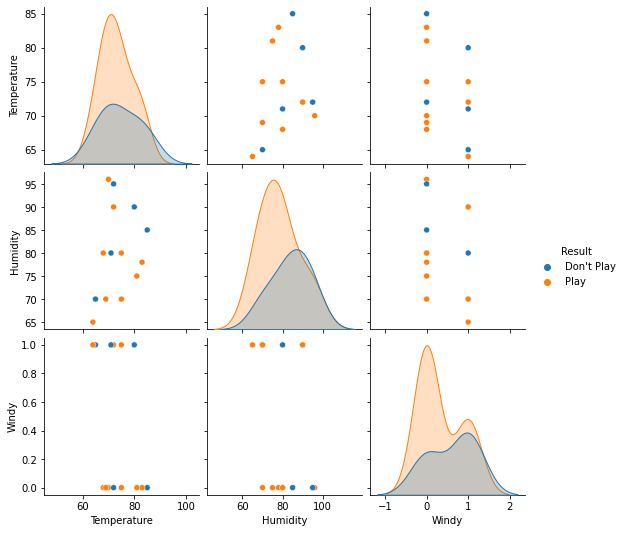

In [524]:
sns.pairplot(data=df, hue = 'Result')

df2

In [525]:
df2=df.join(pd.get_dummies(data=df['Outlook']))
df3=df2.join(pd.get_dummies(data=df['Windy']))

In [526]:
!cd /content/data
!ls
!cd data
!ls 

data  drive  sample_data
data  drive  sample_data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


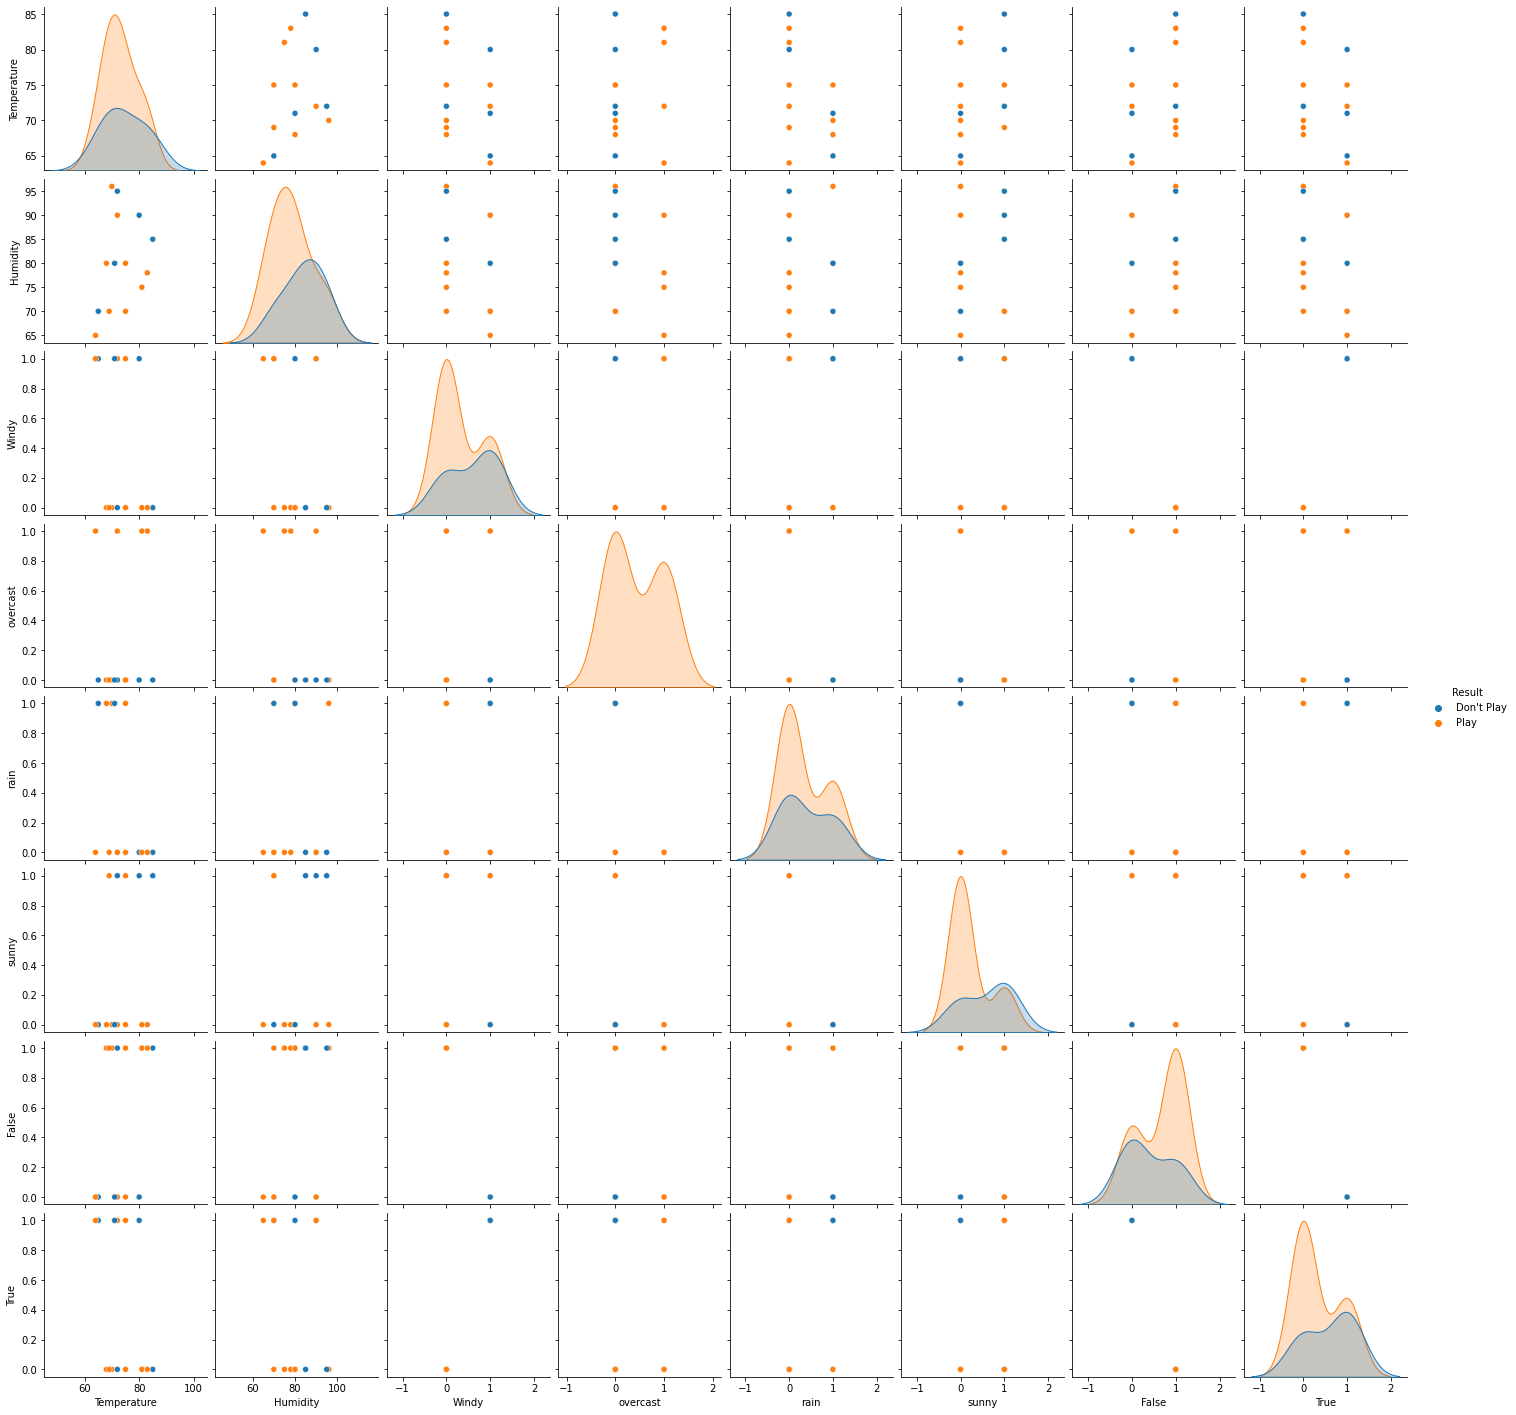

In [527]:
sns.pairplot(data=df3, hue = 'Result')

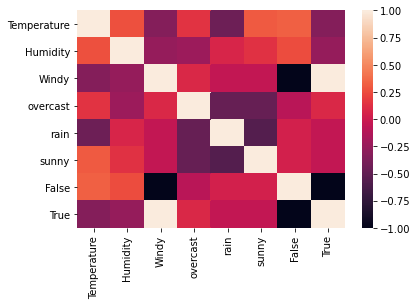

In [528]:
sns.heatmap(df3.corr())

In [529]:
#label encoding
le = LabelEncoder()
Result = le.fit_transform(df['Result'])
Result

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [530]:
le = LabelEncoder()
df5=df
df5['Windy'] = le.fit_transform(df['Windy'])
df5['Outlook'] = le.fit_transform(df['Outlook'])
df5

,Outlook,Temperature,Humidity,Windy,Result
0,2,85,85,0,Don't Play
1,2,80,90,1,Don't Play
2,0,83,78,0,Play
3,1,70,96,0,Play
4,1,68,80,0,Play
5,1,65,70,1,Don't Play
6,0,64,65,1,Play
7,2,72,95,0,Don't Play
8,2,69,70,0,Play
9,1,75,80,0,Play


In [531]:
X=df5.iloc[:,:4]
X
y=Result

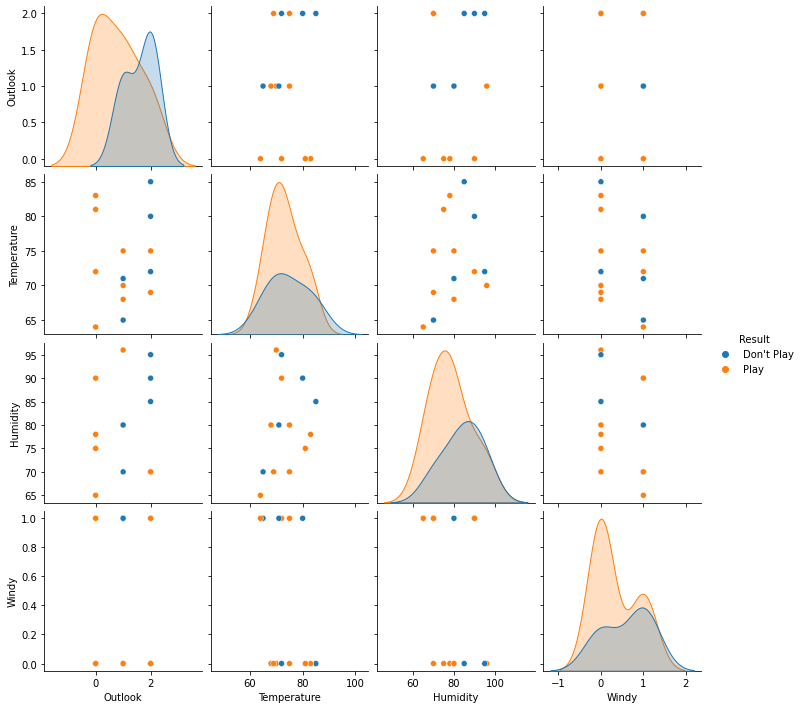

In [532]:
sns.pairplot(data=df5, hue = 'Result')

In [533]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (11, 4)
Testing split input-  (3, 4)


In [534]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [535]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



Text(0.5, 1.0, 'Accuracy Score: 0.6666666666666666')

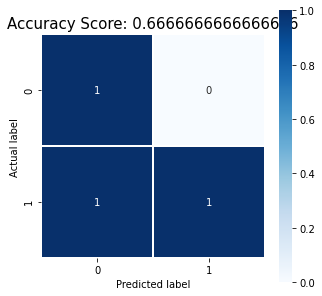

In [536]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')

plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

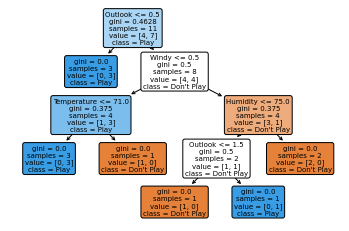

In [537]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names =df5.columns, class_names =["Don't Play", "Play"] , filled = True , precision = 4, rounded = True)


In [538]:
!pwd

/content


In [539]:
!pip install RandomForest

ERROR: Could not find a version that satisfies the requirement RandomForest (from versions: none)
ERROR: No matching distribution found for RandomForest


In [540]:
sklearn.ensemble.RandomForestRegressor

sklearn.ensemble._forest.RandomForestRegressor

In [541]:
import sklearn

In [542]:
rf =sklearn.ensemble.RandomForestRegressor(n_estimators=20)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
print("score:", rf.score(X_test, y_test))

score: -0.6350000000000002


In [543]:
churn =pd.read_csv('data/churn.csv')

In [544]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [545]:
churn=churn.rename(columns={'VMail Plan':"Mail_Plan","Int'l Plan":'Int_Plan'})

In [546]:
churn

,State,Account Length,Area Code,Phone,Int_Plan,Mail_Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [547]:
churn['Int_Plan']=churn['Int_Plan'].apply(lambda x: 0 if x=='no' else 1) 

In [548]:
churn['Mail_Plan']=churn['Mail_Plan'].apply(lambda x: 0 if x=='no' else 1) 

In [549]:
print(churn.head(3))

  State  Account Length  Area Code  ... Intl Charge  CustServ Calls  Churn?
0    KS             128        415  ...        2.70               1  False.
1    OH             107        415  ...        3.70               1  False.
2    NJ             137        415  ...        3.29               0  False.

[3 rows x 21 columns]


In [550]:
churn.head(3)

,State,Account Length,Area Code,Phone,Int_Plan,Mail_Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [551]:
churn.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int_Plan          0
Mail_Plan         0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [552]:
y=churn.pop('Churn?')

In [553]:
X.head(3)

,Outlook,Temperature,Humidity,Windy
0,2,85,85,0
1,2,80,90,1
2,0,83,78,0


In [554]:
y.head(3)

0    False.
1    False.
2    False.
Name: Churn?, dtype: object

In [555]:
churn.head(3)

,State,Account Length,Area Code,Phone,Int_Plan,Mail_Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0


In [556]:
churn.drop('State',axis=1)

,Account Length,Area Code,Phone,Int_Plan,Mail_Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,414-4276,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,370-3271,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,328-8230,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,364-6381,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [557]:
X=churn.to_numpy()

In [558]:
X.shape

(3333, 20)

In [559]:
y.shape

(3333,)

In [560]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)


In [561]:
X_train.shape

(2666, 20)

In [562]:
y_train.shape

(2666,)

In [563]:
y_train

817     False.
1373     True.
679      True.
56      False.
1993    False.
         ...  
1095    False.
1130    False.
1294    False.
860     False.
3174    False.
Name: Churn?, Length: 2666, dtype: object

In [564]:
y_train.shape

(2666,)

In [565]:
y_train.dtype

dtype('O')

In [566]:
y_train.dtype

dtype('O')

In [567]:
X_train.dtype

dtype('O')

In [568]:
X_train.shape

(2666, 20)

In [569]:
X_train

array([['UT', 243, 510, ..., 6, 1.78, 2],
       ['SC', 108, 415, ..., 4, 1.11, 4],
       ['TX', 75, 415, ..., 9, 2.35, 1],
       ...,
       ['OR', 66, 408, ..., 5, 2.48, 1],
       ['HI', 169, 415, ..., 6, 2.67, 2],
       ['SC', 36, 408, ..., 6, 2.32, 2]], dtype=object)

In [570]:
churn

,State,Account Length,Area Code,Phone,Int_Plan,Mail_Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,415,370-3271,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,510,328-8230,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,510,364-6381,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [571]:
X=churn.to_numpy()

In [572]:
X.dtype

dtype('O')

In [573]:
X

array([['KS', 128, 415, ..., 3, 2.7, 1],
       ['OH', 107, 415, ..., 3, 3.7, 1],
       ['NJ', 137, 415, ..., 5, 3.29, 0],
       ...,
       ['RI', 28, 510, ..., 6, 3.81, 2],
       ['CT', 184, 510, ..., 10, 1.35, 2],
       ['TN', 74, 415, ..., 4, 3.7, 0]], dtype=object)

In [574]:
churn=churn.drop('State',axis=1)

In [575]:
X=churn.to_numpy()

In [576]:
X

array([[128, 415, '382-4657', ..., 3, 2.7, 1],
       [107, 415, '371-7191', ..., 3, 3.7, 1],
       [137, 415, '358-1921', ..., 5, 3.29, 0],
       ...,
       [28, 510, '328-8230', ..., 6, 3.81, 2],
       [184, 510, '364-6381', ..., 10, 1.35, 2],
       [74, 415, '400-4344', ..., 4, 3.7, 0]], dtype=object)

In [577]:
y

0       False.
1       False.
2       False.
3       False.
4       False.
         ...  
3328    False.
3329    False.
3330    False.
3331    False.
3332    False.
Name: Churn?, Length: 3333, dtype: object

In [578]:
X.dtype

dtype('O')

In [579]:
churn.info

<bound method DataFrame.info of       Account Length  Area Code  ... Intl Charge  CustServ Calls
0                128        415  ...        2.70               1
1                107        415  ...        3.70               1
2                137        415  ...        3.29               0
3                 84        408  ...        1.78               2
4                 75        415  ...        2.73               3
...              ...        ...  ...         ...             ...
3328             192        415  ...        2.67               2
3329              68        415  ...        2.59               3
3330              28        510  ...        3.81               2
3331             184        510  ...        1.35               2
3332              74        415  ...        3.70               0

[3333 rows x 19 columns]>

In [580]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   Area Code       3333 non-null   int64  
 2   Phone           3333 non-null   object 
 3   Int_Plan        3333 non-null   int64  
 4   Mail_Plan       3333 non-null   int64  
 5   VMail Message   3333 non-null   int64  
 6   Day Mins        3333 non-null   float64
 7   Day Calls       3333 non-null   int64  
 8   Day Charge      3333 non-null   float64
 9   Eve Mins        3333 non-null   float64
 10  Eve Calls       3333 non-null   int64  
 11  Eve Charge      3333 non-null   float64
 12  Night Mins      3333 non-null   float64
 13  Night Calls     3333 non-null   int64  
 14  Night Charge    3333 non-null   float64
 15  Intl Mins       3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   f

In [581]:
churn=churn.drop('Phone',axis=1)

In [582]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   Area Code       3333 non-null   int64  
 2   Int_Plan        3333 non-null   int64  
 3   Mail_Plan       3333 non-null   int64  
 4   VMail Message   3333 non-null   int64  
 5   Day Mins        3333 non-null   float64
 6   Day Calls       3333 non-null   int64  
 7   Day Charge      3333 non-null   float64
 8   Eve Mins        3333 non-null   float64
 9   Eve Calls       3333 non-null   int64  
 10  Eve Charge      3333 non-null   float64
 11  Night Mins      3333 non-null   float64
 12  Night Calls     3333 non-null   int64  
 13  Night Charge    3333 non-null   float64
 14  Intl Mins       3333 non-null   float64
 15  Intl Calls      3333 non-null   int64  
 16  Intl Charge     3333 non-null   float64
 17  CustServ Calls  3333 non-null   i

In [583]:
X=churn.to_numpy()

In [584]:
X

array([[128.  , 415.  ,   0.  , ...,   3.  ,   2.7 ,   1.  ],
       [107.  , 415.  ,   0.  , ...,   3.  ,   3.7 ,   1.  ],
       [137.  , 415.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 28.  , 510.  ,   0.  , ...,   6.  ,   3.81,   2.  ],
       [184.  , 510.  ,   1.  , ...,  10.  ,   1.35,   2.  ],
       [ 74.  , 415.  ,   0.  , ...,   4.  ,   3.7 ,   0.  ]])

In [585]:
X.dtype

dtype('float64')

In [586]:
y

0       False.
1       False.
2       False.
3       False.
4       False.
         ...  
3328    False.
3329    False.
3330    False.
3331    False.
3332    False.
Name: Churn?, Length: 3333, dtype: object

In [587]:
y_test

438     False.
2674    False.
1345     True.
1957    False.
2148    False.
         ...  
2577    False.
2763    False.
3069    False.
1468    False.
582     False.
Name: Churn?, Length: 667, dtype: object

In [588]:
y=y.apply(lambda x: 0 if x=='False.' else 1) 

In [589]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn?, Length: 3333, dtype: int64

In [590]:
y.dtype

dtype('int64')

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)


In [592]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [593]:
# Predicting the values of test data
predict=rf.predict(X_test)
predict.shape
#print("Classification report - \n", classification_report(y_test,y_pred))

(667,)

In [594]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predict)
score

0.952023988005997

In [595]:
from sklearn.metrics import precision_score
precision_score(y_test,predict)

0.948051948051948

In [596]:
from sklearn.metrics import recall_score
recall_score(y_test,predict)

0.7227722772277227

In [597]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict)
cm

array([[562,   4],
       [ 28,  73]])

Text(0.5, 1.0, 'Accuracy Score: 0.952')

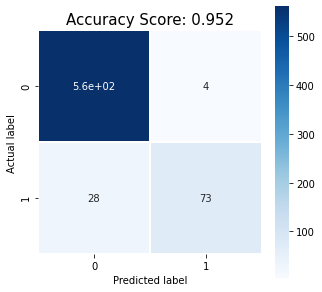

In [598]:

plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')

plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(score,3))
plt.title(all_sample_title, size = 15)

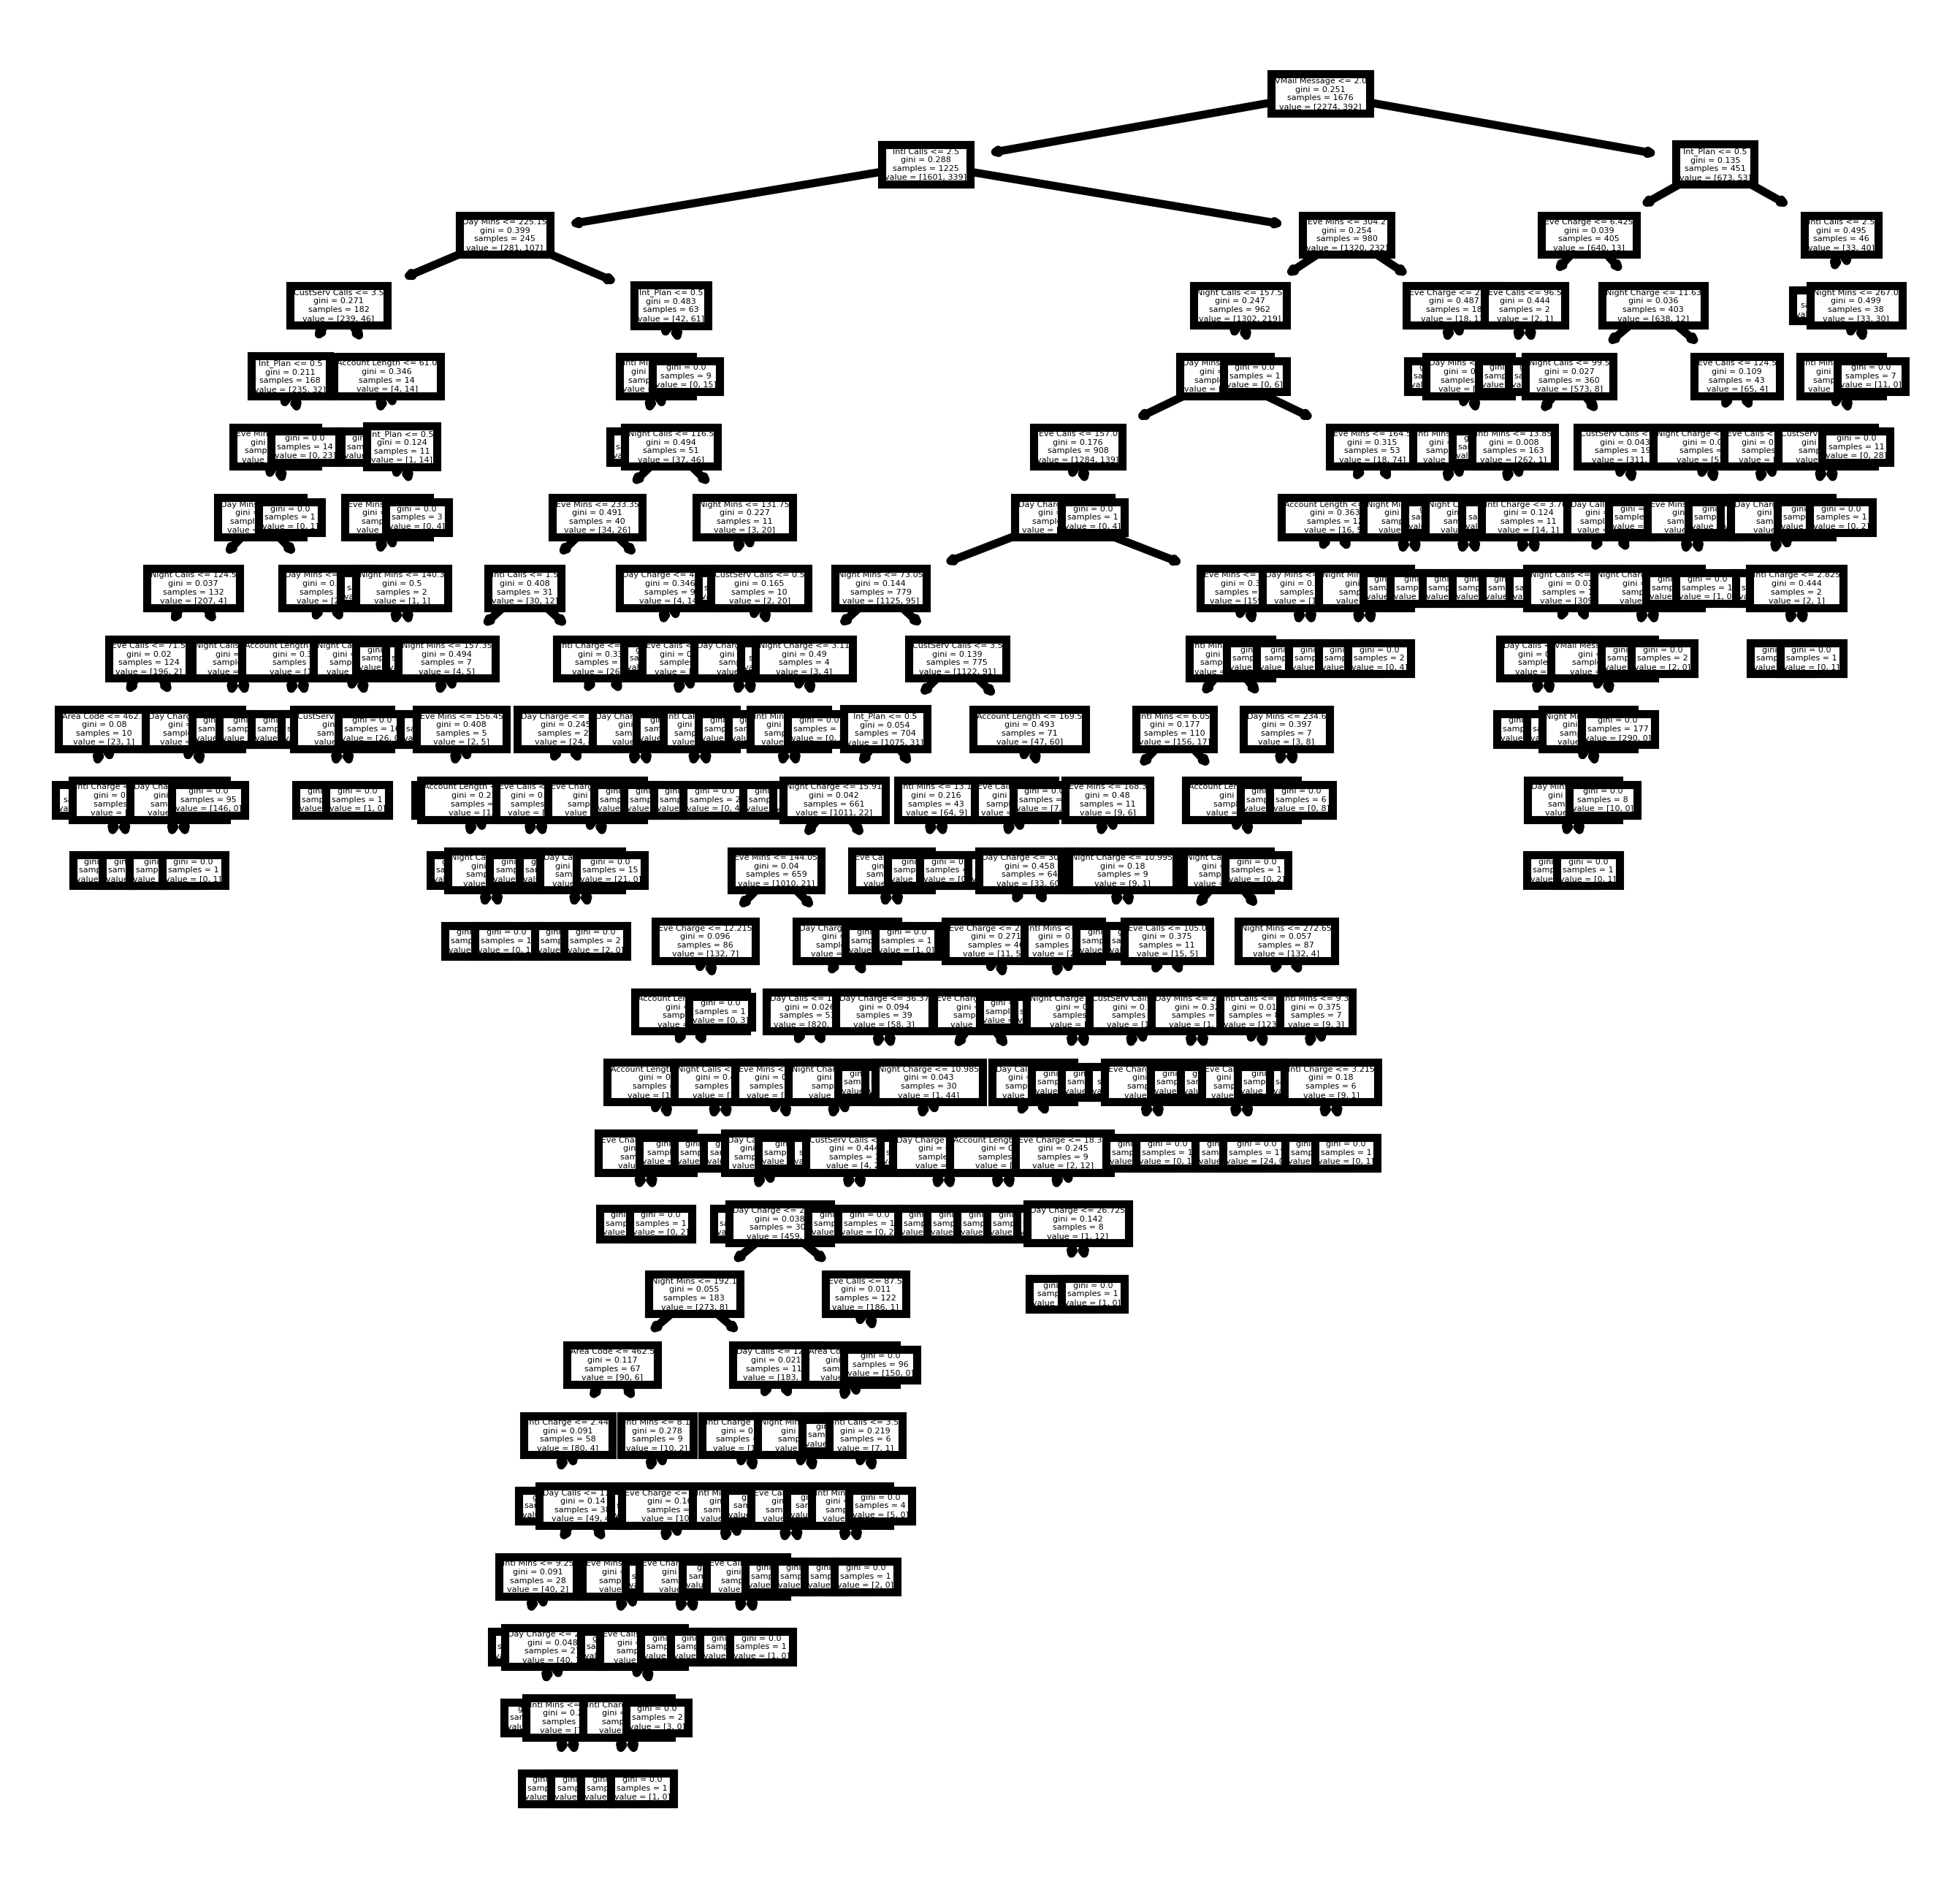

In [607]:
fn=churn.columns
#cn=['Churn']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn)
#class_names=cn
fig.savefig('rf_individualtree.png') 

In [ ]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=rf, feature_names =df5.columns, class_names =["Churn", "Dont"] , filled = True , precision = 4, rounded = True)


In [ ]:
from sklearn.tree import export_graphviz


export_graphviz(tree_in_forest,
                feature_names=X.columns,
                filled=True,
                rounded=True)

In [ ]:
churn=churn.rename(columns={'VMail Plan':"Plan"})

In [ ]:
b